<a href="https://colab.research.google.com/github/yashjain-99/Projects/blob/main/FaceMaskRecog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset From: https://github.com/prajnasb/observations
author: Yash Jain @https://github.com/yashjain-99

In [2]:
import os
import zipfile
import random
import tensorflow as tf
import shutil
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd
from PIL import Image
import cv2

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile

# Unzip training set
local_zip = '/content/drive/MyDrive/Colab Notebooks/observations-master.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./MaskRecog')

zip_ref.close()

In [3]:
trainig_dir='/content/MaskRecog/observations-master/experiements/dest_folder/train/'
Val_dir='/content/MaskRecog/observations-master/experiements/dest_folder/val/'
test_dir='/content/MaskRecog/observations-master/experiements/dest_folder/test/'

(351, 312, 3)


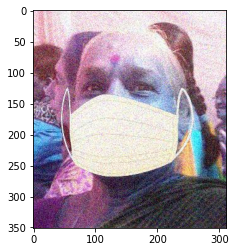

[[[203 168 195]
  [227 192 219]
  [255 238 255]
  ...
  [244 248 242]
  [206 212 207]
  [227 233 228]]

 [[255 227 253]
  [229 194 220]
  [248 213 239]
  ...
  [250 241 238]
  [231 223 223]
  [246 238 238]]

 [[236 202 226]
  [255 221 245]
  [246 212 236]
  ...
  [255 234 240]
  [254 220 227]
  [244 210 217]]

 ...

 [[ 98  44  91]
  [ 91  34  89]
  [ 91  27  99]
  ...
  [ 88  77  79]
  [ 90  78  78]
  [ 93  80  78]]

 [[ 81  31  71]
  [ 95  42  92]
  [ 93  31 101]
  ...
  [ 78  70  77]
  [ 63  51  57]
  [ 62  48  52]]

 [[ 92  47  80]
  [103  54 100]
  [ 77  17  87]
  ...
  [ 86  77  98]
  [ 59  43  66]
  [ 57  39  62]]]


In [14]:
categories=['with_mask', 'without_mask']
import matplotlib.pyplot as plt
for category in categories:
    path = os.path.join(trainig_dir,category) 
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        print(img_array.shape) 
        plt.imshow(img_array)  
        plt.show() 
        break  
    break 
print(img_array)

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        trainig_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=128,
        # Since you used binary_crossentropy loss, you need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        Val_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=32,
        # Since you used binary_crossentropy loss, you need binary labels
        class_mode='binary')

Found 1315 images belonging to 2 classes.
Found 142 images belonging to 2 classes.


In [5]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [6]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [7]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 99.0% accuracy so cancelling training!")
      self.model.stop_training = True

In [8]:
callbacks = myCallback()
history = model.fit(
      train_generator, 
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      callbacks=[callbacks])

Epoch 1/15
11/11 [==============================] - 34s 3s/step - loss: 10.2654 - accuracy: 0.5285 - val_loss: 0.5230 - val_accuracy: 0.8239
Epoch 2/15
11/11 [==============================] - 32s 3s/step - loss: 0.7029 - accuracy: 0.7894 - val_loss: 0.4575 - val_accuracy: 0.7887
Epoch 3/15
11/11 [==============================] - 32s 3s/step - loss: 0.2881 - accuracy: 0.9042 - val_loss: 0.1713 - val_accuracy: 0.9296
Epoch 4/15
11/11 [==============================] - 32s 3s/step - loss: 0.2312 - accuracy: 0.9125 - val_loss: 0.1742 - val_accuracy: 0.9437
Epoch 5/15
11/11 [==============================] - 31s 3s/step - loss: 0.2390 - accuracy: 0.9095 - val_loss: 0.1517 - val_accuracy: 0.9577
Epoch 6/15
11/11 [==============================] - 32s 3s/step - loss: 0.2020 - accuracy: 0.9217 - val_loss: 0.1437 - val_accuracy: 0.9507
Epoch 7/15
11/11 [==============================] - 31s 3s/step - loss: 0.1134 - accuracy: 0.9574 - val_loss: 0.3641 - val_accuracy: 0.8944
Epoch 8/15
11/11 [=

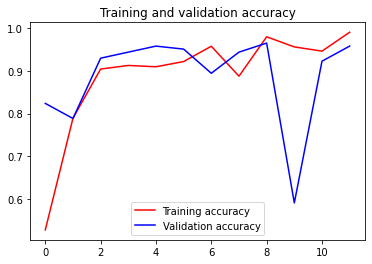

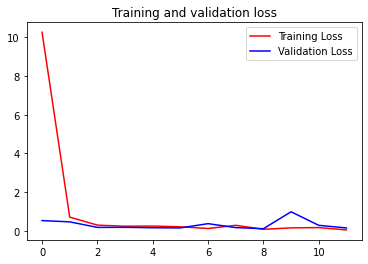

In [9]:
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
acc =  history.history['accuracy']
val_acc = history.history['val_accuracy']
loss =  history.history['loss']
val_loss =  history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [33]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
def prediction(pth):
  img = image.load_img(pth, target_size=(150, 150))
  x = image.img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  return classes[0]

[0.02272421]
[0.00068998]
[1.1936907e-05]
[0.00564951]
[0.00018555]
[0.00034314]
[0.00043595]
[0.03124774]
[0.02055085]
[0.17907867]


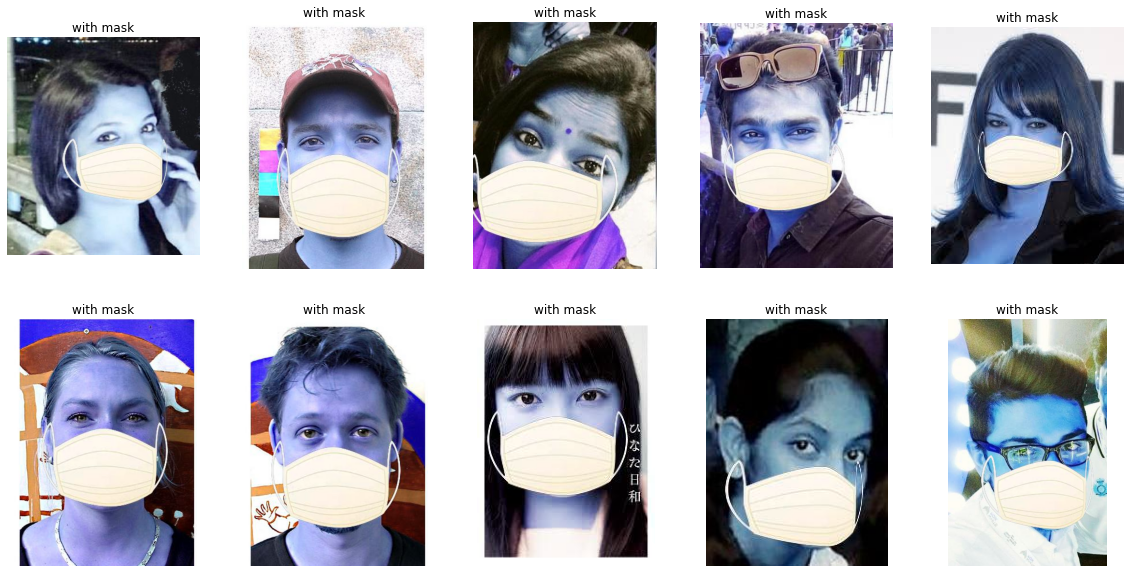

In [31]:
rows=2
columns=5
fig = plt.figure(figsize=(20, 10))
i=0
path_withmask='/content/MaskRecog/observations-master/experiements/dest_folder/test/with_mask'
path_withoutmask='/content/MaskRecog/observations-master/experiements/dest_folder/test/without_mask'
for images in random.sample(os.listdir(path_withmask),10):
  i+=1
  p=os.path.join(path_withmask,images)
  pred=prediction(p)
  if pred>0.5:
    t="without mask"
  else:
    t= "with mask"
  temp=cv2.imread(os.path.join(path_withmask,images))
  fig.add_subplot(rows, columns, i)
  plt.imshow(temp)
  plt.title(t)
  plt.axis('off')

In [24]:
os.mkdir('/content/MaskRecog/observations-master/experiements/dest_folder/test_combine')

In [26]:
for images in (os.listdir(path_withmask)):
  shutil.copy(os.path.join(path_withmask,images),'/content/MaskRecog/observations-master/experiements/dest_folder/test_combine')

In [29]:
for images in (os.listdir(path_withoutmask)):
  shutil.copy(os.path.join(path_withoutmask,images),'/content/MaskRecog/observations-master/experiements/dest_folder/test_combine')

[0.00033703]
[0.00566086]
[0.9925778]
[0.99854076]
[0.01389113]
[0.9128973]
[0.9997945]
[3.753574e-05]
[2.3859668e-05]
[6.9074944e-05]
[0.00061974]
[6.7452534e-06]
[0.97794235]
[0.7654431]
[1.1936907e-05]
[0.9970129]
[0.00065547]
[7.257881e-06]
[3.133478e-05]
[0.95338905]


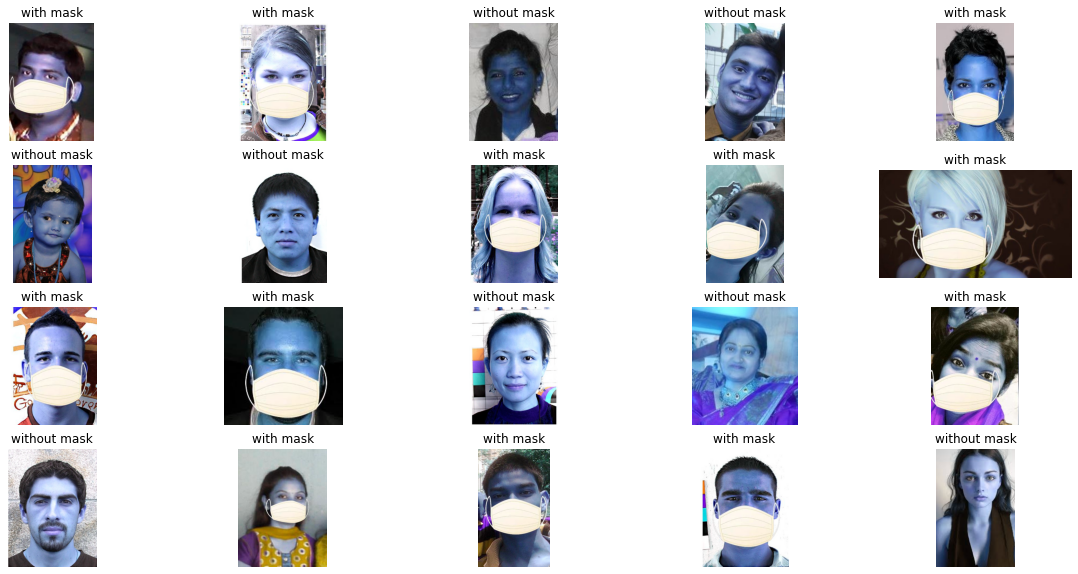

In [32]:
path_combine='/content/MaskRecog/observations-master/experiements/dest_folder/test_combine'
rows=4
columns=5
fig = plt.figure(figsize=(20, 10))
i=0
for images in random.sample(os.listdir(path_combine),20):
  i+=1
  p=os.path.join(path_combine,images)
  pred=prediction(p)
  if pred>0.5:
    t="without mask"
  else:
    t= "with mask"
  temp=cv2.imread(os.path.join(path_combine,images))
  fig.add_subplot(rows, columns, i)
  plt.imshow(temp)
  plt.title(t)
  plt.axis('off')

In [42]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()
for fn in uploaded.keys():
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " without mask")
  else:
    print(fn + " with mask")

Saving MV5BNjYwMzJiOGEtMjk4Ni00NDI0LTkxMDMtNTI3M2ZmZjFhZTgwXkEyXkFqcGdeQXVyNjg4NzAyOTA@._V1_.jpg to MV5BNjYwMzJiOGEtMjk4Ni00NDI0LTkxMDMtNTI3M2ZmZjFhZTgwXkEyXkFqcGdeQXVyNjg4NzAyOTA@._V1_.jpg
[1.]
MV5BNjYwMzJiOGEtMjk4Ni00NDI0LTkxMDMtNTI3M2ZmZjFhZTgwXkEyXkFqcGdeQXVyNjg4NzAyOTA@._V1_.jpg without mask
